<a href="https://colab.research.google.com/github/drshahizan/python-web/blob/main/requests/Requests_WebScrapping_NoName.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Web Scrapping (Requests)
**Group 7:** No Name

**Group Members:**
1. Madina Suraya binti Zharin A20EC0203
2. Nur Izzah Mardhiah binti Rashidi A20EC0116
3. Tan Yong Sheng A20EC0157
4. Chloe Racquelmae Kennedy A20EC0026

In this notebook, we are going to use **requests library** to fetch the content from the URL given and **beautiful soup library** helps to parse it and fetch the details the way we want. 

Requests library is the best choice to start web scraping and have access to an API. 

*   It is easy to understand and does not require much practice to master
*   Requests also minimizes the need to include query strings in your URLs manually.
*   It also supports authentication modules and handles cookies and sessions with excellent stability.

In [16]:
import requests
import csv
from bs4 import BeautifulSoup
import pandas as pd

In [17]:
url = 'https://my.puma.com/my/en/women/shoes/sneakers'

The code below is to access URL of the website using requests

In [18]:
web_page = requests.get(url)

Then, we format the website content into a readable format.

In [19]:
soup = BeautifulSoup(web_page.content, 'html.parser')

We first need to inspect the website to search for the element that wraps the items information that we would like to scrape. For example in this case, the item title, new price and old price are wrapped in a class element called 'grid-tile'

Finding the correct class element can be confusing and overwhelming since the HTML code can be very messy. The tips here is to use the [HTML Formatter](https://webformatter.com/html)

In [20]:
main_box=soup.find_all('div', {'class':'grid-tile'})

We then acknowldedge that there is 36 items that are wrapped under 'grid-tile' class.

In [21]:
len(main_box)

36

<div class="grid-tile" data-component="plp/TileItem" data-masterpid="367047" data-pid="4059505780463" data-puma-analytics='{"products":[{"styleID":"367047_01","localName":"Muse Metal Women’s Trainers","productID":"367047_01","bundle":false,"set":false,"productName":"Muse Metal Women’s Trainers","productCategory":"Sneakers","category":"womens-shoes-sneakers","price":300.3,"quantity":1,"EAN":"4059505780463","UPC":"191240780460","inventory":"Available","status":"","manuName":"","manuSKU":"","promos":[{"id":"MY-SHOECARE-LACE-PWP","code":"","name":"MY-SHOECARE-LACE-PWP","type":"","amount":0},{"id":"sales-category-promotion-MY","code":"","name":"sales-category-promotion-MY","type":"","amount":0}],"imageURL":"https://images.puma.net/images/367047/01/sv01/fnd/KOR/w/600/h/600/","skuID":"4059505780463","inStock":"true","orderable":"true","discounted":"false"}]}'>
<div>
<div class="product-tile" data-href="/on/demandware.store/Sites-MY-Site/en_MY/Product-Variations?pid=4059505780463&amp;dynamicBa
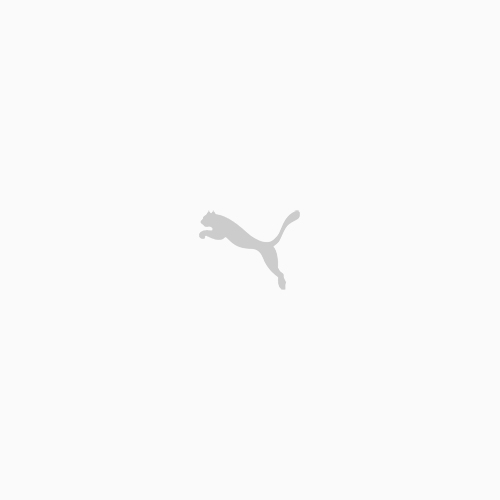
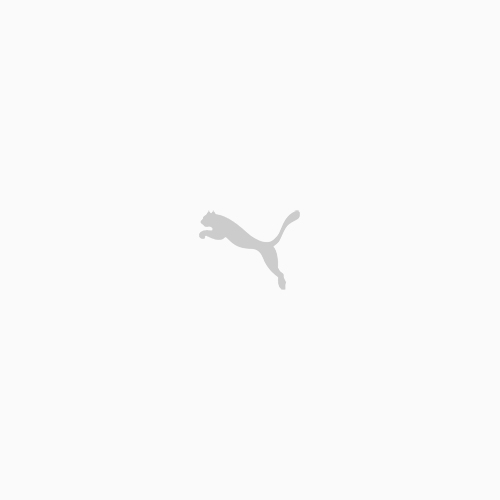
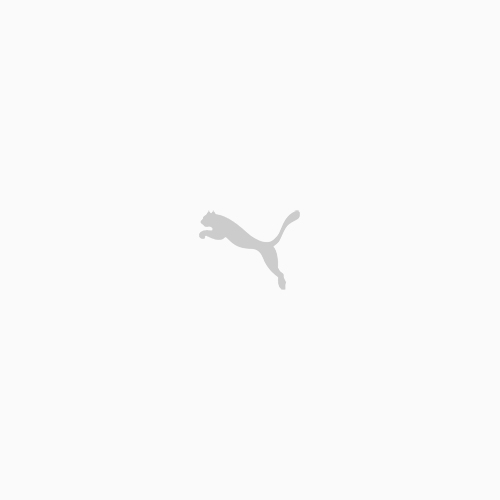
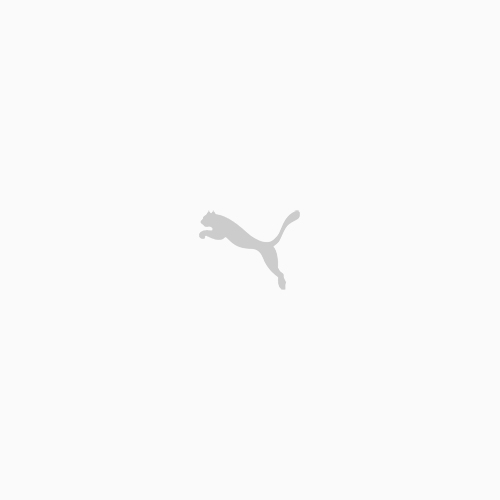
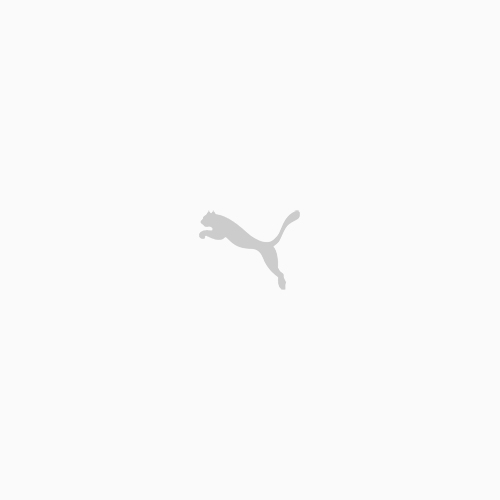
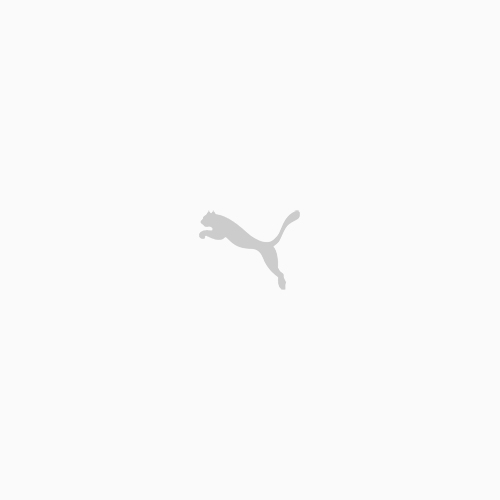

In [22]:
box=main_box[0]
box

Now, we separate and store the item information (product name, new price, old price) into their respective variables according to their class element using the strip text function.

In [23]:
product_name = soup.find('a', {'class':'product-tile-title product-tile__title pdp-link line-item-limited line-item-limited--2'}).text.strip()
price_new = soup.find('div', {'class':'product-tile-price-new product-tile__price--new'}).text.strip()
price_old = soup.find('div', {'class':'product-tile-price-old product-tile__price--old'}).text.strip()

In [24]:
print(product_name,price_new,price_old)

Muse Metal Women’s Trainers RM 300.30 RM 429.00


Extract out useful information and save it into a structured format which is a dataframe.

In [25]:
data_list = []
for box in main_box:
  temp_dict={}
  temp_dict['PRODUCT NAME'] = box.find('a', {'class':'product-tile-title product-tile__title pdp-link line-item-limited line-item-limited--2'}).text.strip()
  
  price_new = box.find('div', {'class':'product-tile-price-new product-tile__price--new'})
  if price_new:
    temp_dict['PRICE NEW'] = price_new.text.strip()
  else:
    temp_dict['PRICE NEW'] = None
  
  price_old = box.find('div', {'class':'product-tile-price-old product-tile__price--old'})
  if price_old:
    temp_dict['PRICE OLD'] = price_old.text.strip()
  else:
    temp_dict['PRICE OLD'] = None

  data_list.append(temp_dict)

In [26]:
df = pd.DataFrame(data_list)
df

,PRODUCT NAME,PRICE NEW,PRICE OLD
0,Muse Metal Women’s Trainers,RM 300.30,RM 429.00
1,Muse X-2 Metallic Women's Sneakers,RM 300.30,RM 429.00
2,Slipstream Lo Wabi-Sabi Sneakers,None,None
3,Graviton Trainers,RM 236.88,RM 329.00
4,Smash v2 Trainers,None,None
5,Taper Trainers,RM 164.88,RM 229.00
6,Slipstream Sneakers,None,None
7,PUMA x KOCHÉ PWR XX NITRO Training Shoes Women,None,None
8,Mayze Stack Sneakers Women,None,None
9,Smash Cat Leather Trainers,None,None


There are some item information (price) that is failed to be extracted. Hence, we drop the rows with null values.

In [27]:
df = df.dropna()
df

,PRODUCT NAME,PRICE NEW,PRICE OLD
0,Muse Metal Women’s Trainers,RM 300.30,RM 429.00
1,Muse X-2 Metallic Women's Sneakers,RM 300.30,RM 429.00
3,Graviton Trainers,RM 236.88,RM 329.00
5,Taper Trainers,RM 164.88,RM 229.00
26,Harrow Women's Shoes,RM 215.28,RM 299.00
27,Wired Run In Motion Sneakers,RM 258.48,RM 359.00
28,Harrow Women's Shoes,RM 215.28,RM 299.00
29,Harrow Women's Shoes,RM 215.28,RM 299.00
30,Court Star Suede Trainers,RM 212.54,RM 369.00
31,Court Star Suede Trainers,RM 212.54,RM 369.00


We also remove the duplicated items.

In [28]:
df = df.drop_duplicates()
df

,PRODUCT NAME,PRICE NEW,PRICE OLD
0,Muse Metal Women’s Trainers,RM 300.30,RM 429.00
1,Muse X-2 Metallic Women's Sneakers,RM 300.30,RM 429.00
3,Graviton Trainers,RM 236.88,RM 329.00
5,Taper Trainers,RM 164.88,RM 229.00
26,Harrow Women's Shoes,RM 215.28,RM 299.00
27,Wired Run In Motion Sneakers,RM 258.48,RM 359.00
30,Court Star Suede Trainers,RM 212.54,RM 369.00
35,Smash Vulcanised V3 Low Trainers,RM 186.48,RM 259.00


We then can store this data into an Excel file. We just successfully created our dataset! 

In [29]:
df.to_csv('puma_sneakers_women_sale.csv', index=False)